In [122]:
import pandas as pd 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy import stats

import acquire
import prepare

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Acquiring data

In [15]:
df = prepare.get_data()

In [16]:
df.head()

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,precipitation_rolling_14,precipitation_rolling_30,avg_temp_rolling_7,avg_temp_rolling_14,avg_temp_rolling_30,max_temp_rolling_7,max_temp_rolling_14,max_temp_rolling_30,min_temp_rolling_7,min_temp_rolling_14,min_temp_rolling_30
0,6582,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746,0.00,0.0,0.0,69.0,79,60,1,1,0,0,0,0,0.004286,0.005714,0.016333,54.285714,55.285714,54.2,65.857143,65.714286,64.533333,46.000000,47.642857,45.900000
1,6583,2019-03-10,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,3,2019,11,0.0,8.0,157.00,PVC,1988.0,NaN,NaN,6804 S FLORES,1,1.0,0,GRAVITY,Sewer Main,NaN,65.0,2019-03-10 15:30:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","6804 S FLORES,SAN ANTONIO,Texas,USA","Flores, West Odessa, Ector County, Texas, Unit...",Texas,0.00,0.0,0.0,69.0,79,60,1,1,0,0,0,0,0.004286,0.005714,0.016333,54.285714,55.285714,54.2,65.857143,65.714286,64.533333,46.000000,47.642857,45.900000
2,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216,0.03,0.0,0.0,74.0,87,60,1,0,0,0,0,0,0.004286,0.005714,0.016333,51.714286,54.357143,53.3,62.142857,64.785714,63.333333,42.571429,46.714286,45.133333
3,6584,2019-03-09,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.91,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223,0.03,0.0,0.0,74.0,87,60,1,0,0,0,0,0,0.004286,0.005714,0.016333,51.714286,54.357143,53.3,62.142857,64.785714,63.333333,42.571429,46.714286,45.133333
4,6580,2019-03-06,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.90,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209,0.00,0.0,0.0,42.0,56,31,0,0,0,0,0,0,0.002857,0.006429,0.015667,46.571429,52.357143,53.6,55.142857,62.071429,62.866667,38.571429,45.000000,45.233333


# split data

In [11]:
train, test = train_test_split(df, train_size=.8, random_state=123)

# Exploration

In [103]:
df.head(1)

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,precipitation_rolling_14,precipitation_rolling_30,avg_temp_rolling_7,avg_temp_rolling_14,avg_temp_rolling_30,max_temp_rolling_7,max_temp_rolling_14,max_temp_rolling_30,min_temp_rolling_7,min_temp_rolling_14,min_temp_rolling_30
0,6582,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.4,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.0,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746,0.0,0.0,0.0,69.0,79,60,1,1,0,0,0,0,0.004286,0.005714,0.016333,54.285714,55.285714,54.2,65.857143,65.714286,64.533333,46.0,47.642857,45.9


## are cause and rainfall related?
- used data where precipitation was greater than 0

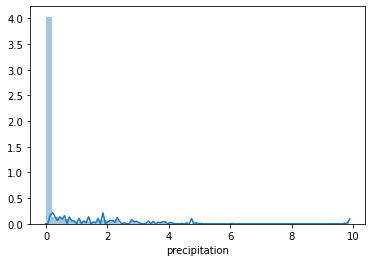

In [120]:
# distribution of precipitation
sns.distplot(train.precipitation)

In [32]:
mask = train[train.precipitation > 0]

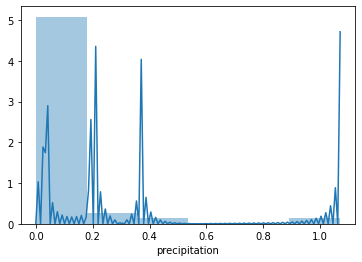

In [121]:
# still weird, but less 0's
# to get a normal dist. we would have to eliminate outliers
sns.distplot(mask.precipitation)

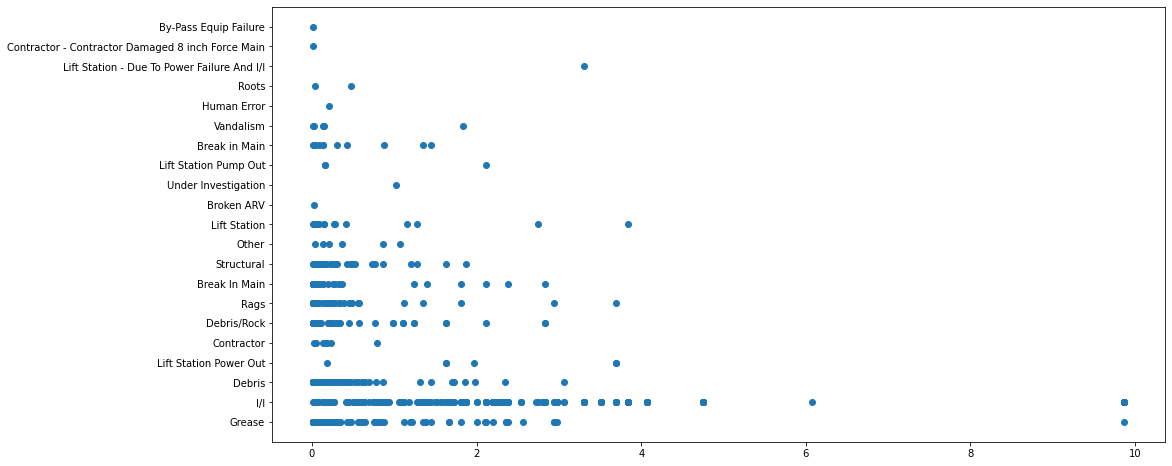

In [68]:
plt.figure(figsize=(16,8))
x = 'precipitation'
y = 'cause'

plt.scatter(y=y, x=x, data=mask)
plt.show()

#### It appears that these are the initially stated causes that happen under higher than normal precipitation
- Lift station
- structural damages
- I/I
- Grease
- Debris
- Debris/Rock

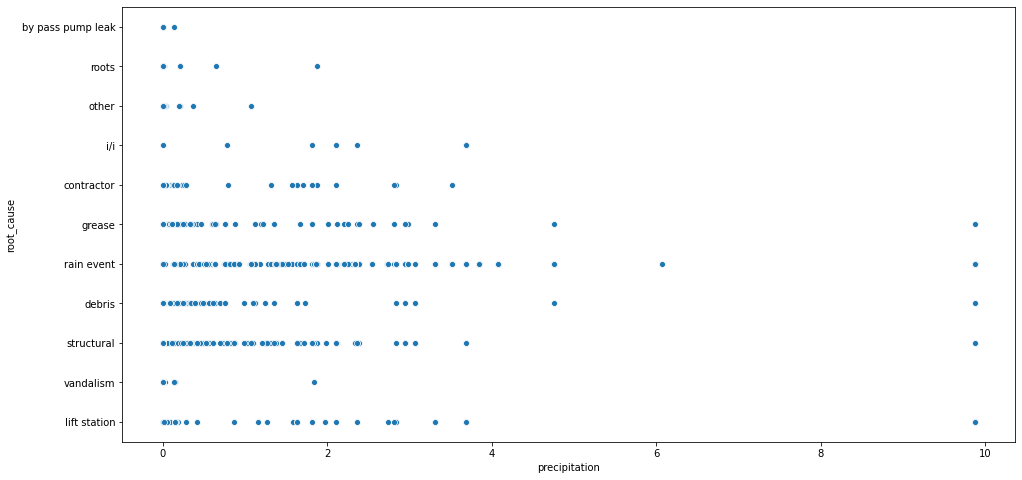

In [102]:
# now lets check root cause against precipitation
plt.figure(figsize=(16,8))
sns.scatterplot(y="root_cause", x="precipitation", data=train)

#### These are the officially determined root issues that are causing damages in high precipitation enviroments
- Rain Event
- Lift Station
- Grease
- Structural
- Debris

### Hypothesis i/i
- $H_0$: Precipitation is not correlated with the cause of the pipe damage involving i/i
- $H_a$: Rainfall is correlated with cause of pipe damage involving i/i

In [139]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'i/i'].precipitation
overall_rainfall = train.precipitation.mean()

t, p = stats.ttest_1samp(i, overall_rainfall)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis P-value: 0.007726667515162204


### Hypothesis grease
- $H_0$: Precipitation is not correlated with the cause of the pipe damage involving grease
- $H_a$: Rainfall is correlated with cause of pipe damage involving grease

In [141]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'grease'].precipitation
overall_rainfall = train.precipitation.mean()

t, p = stats.ttest_1samp(i, overall_rainfall)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis P-value: 6.041108950661502e-20


### Hypothesis structural
- $H_0$: Precipitation is not correlated with the cause of the pipe damage involving structural damages
- $H_a$: Rainfall is correlated with cause of pipe damage involving structural damages

In [144]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].precipitation
overall_rainfall = train.precipitation.mean()

t, p = stats.ttest_1samp(i, overall_rainfall)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis P-value: 1.7102838954174988e-60


### Are temperature and root cause related?


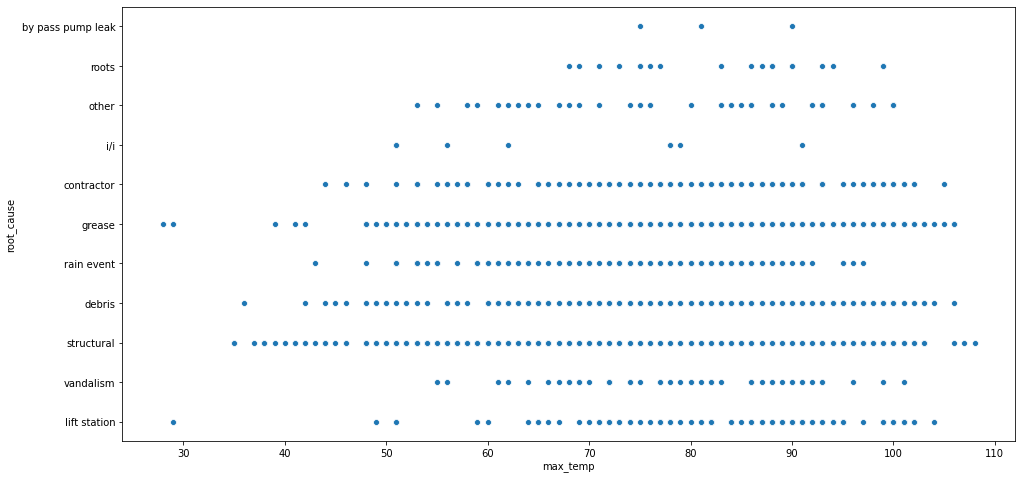

In [101]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="max_temp", y="root_cause", data=train)

#### Doesn't appear so

#### Lets check it out with a bar chart

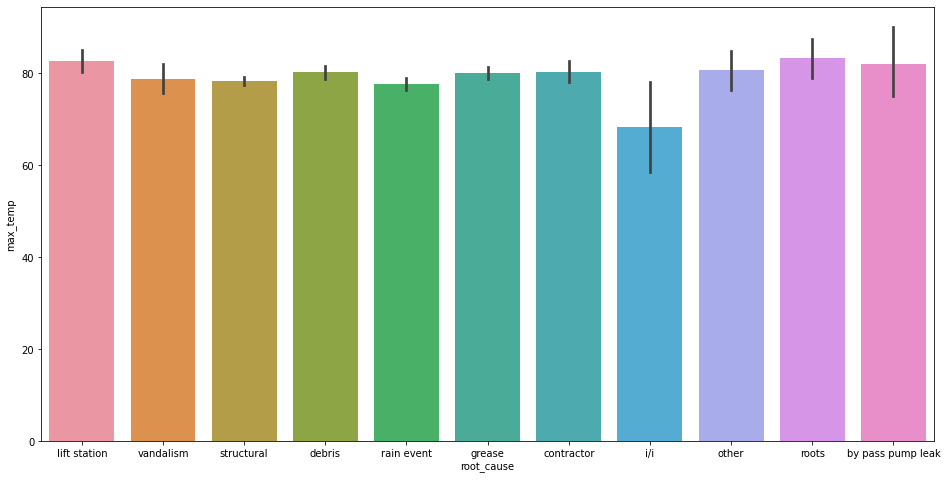

In [73]:
plt.figure(figsize=(16,8))
sns.barplot(x='root_cause', y="max_temp", data=train)

### max temp is normall distributed

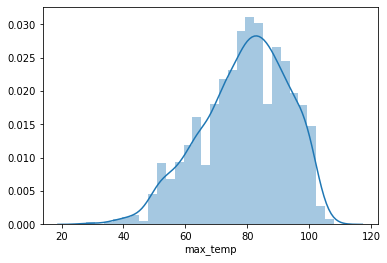

In [94]:
sns.distplot(train.max_temp)

#### now a swarm plot

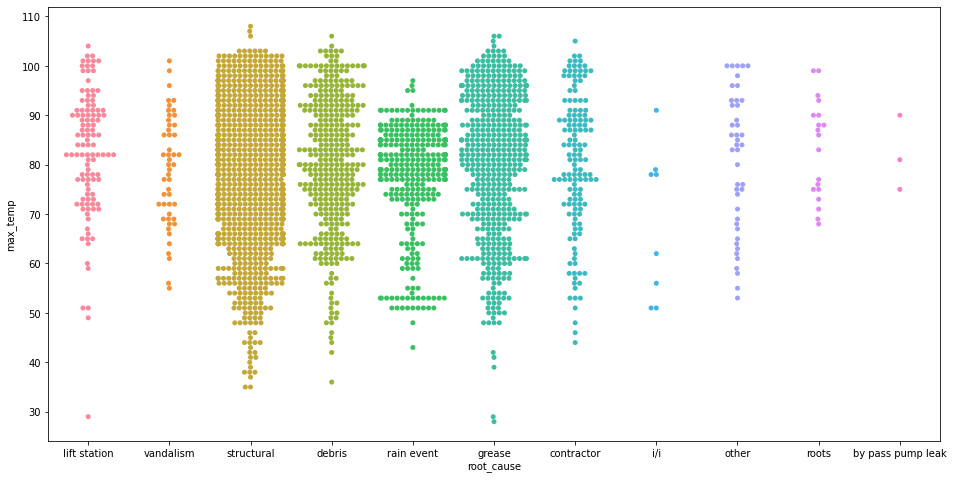

In [80]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='root_cause', y="max_temp", data=train)

### Hypothesis max_temp/grease
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving grease damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving grease damages

In [145]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'grease'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We reject the null hypothesis. P-value: 0.1564421159023603


### Hypothesis max_temp/debris
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving debris damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving debris damages

In [146]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'debris'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We reject the null hypothesis. P-value: 0.12488765473905385


### Hypothesis max_temp/rain_event
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving rain event damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving rain event damages

In [149]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'rain event'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We reject the null hypothesis. P-value: 0.013746006480003296


### Hypothesis max_temp/structural
- $H_0$: max_temp is not correlated with the root cause of the pipe damage involving structural damages
- $H_a$: max_temp is correlated with the root cause of pipe damage involving structural damages

In [147]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].max_temp
overall_max_temp = train.max_temp.mean()

t, p = stats.ttest_1samp(i, overall_max_temp)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We reject the null hypothesis. P-value: 0.0437846982890007


## We have statistically proven that max_temp is not correlated with pipe damages in this data set

#### what about low temps?

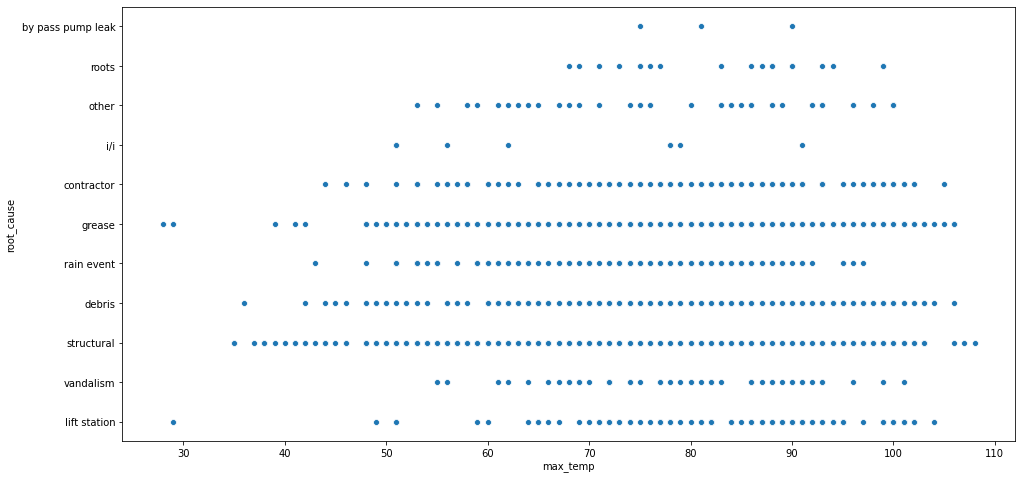

In [99]:
plt.figure(figsize=(16,8))
sns.scatterplot(y="root_cause", x="max_temp", data=train)

### Looks almost exactly the same as max temp

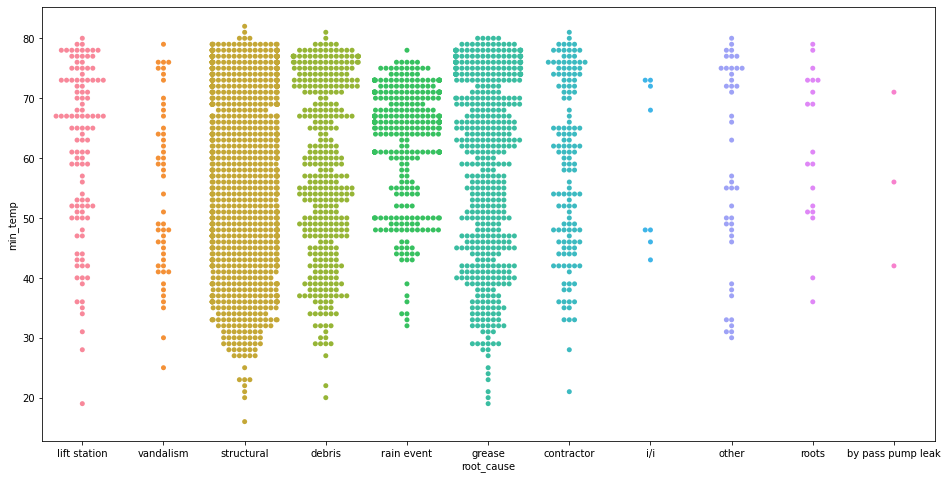

In [82]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="root_cause", y="min_temp", data=train)

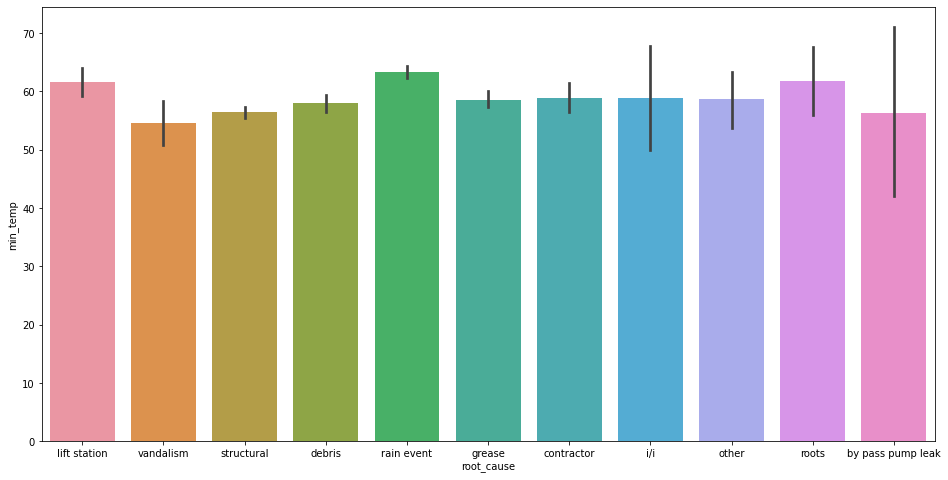

In [83]:
plt.figure(figsize=(16,8))
sns.barplot(x="root_cause", y="min_temp", data=train)

### Hypothesis min_temp/grease
- $H_0$: min_temp is not correlated with the root cause of the pipe damage involving damages invoked by grease
- $H_a$: min_temp is correlated with the root cause of pipe damage involving damages invoked by grease

In [153]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'grease'].min_temp
overall_min_temp = train.min_temp.mean()

t, p = stats.ttest_1samp(i, overall_min_temp)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We reject the null hypothesis. P-value: 0.7387280777411416


### Hypothesis min_temp/structural
- $H_0$: min_temp is not correlated with the root cause of the pipe damage involving structural damages
- $H_a$: min_temp is correlated with the root cause of pipe damage involving structural damages

In [154]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].min_temp
overall_min_temp = train.min_temp.mean()

t, p = stats.ttest_1samp(i, overall_min_temp)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")


We fail to reject the null hypothesis P-value: 8.584672608341485e-05


### maybe average temp will yield more insights

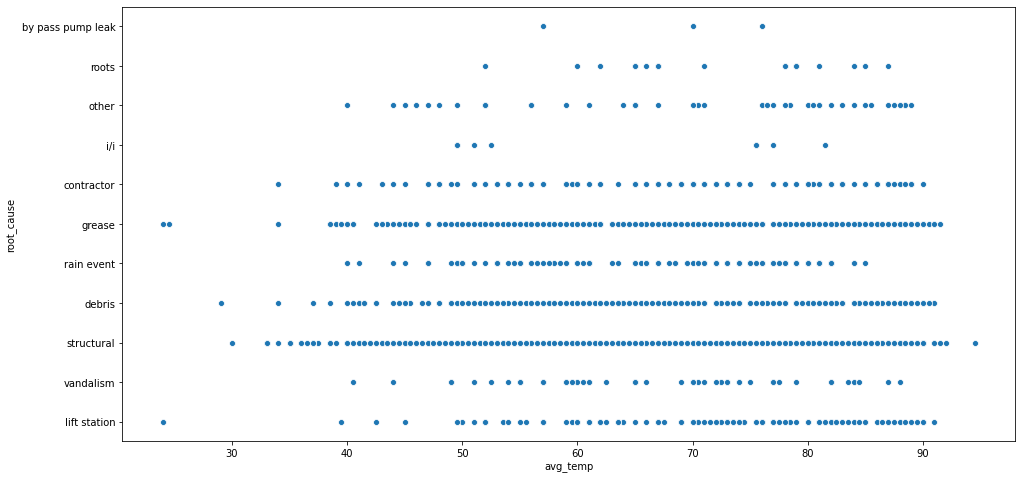

In [98]:
plt.figure(figsize=(16,8))
sns.scatterplot(y="root_cause", x="avg_temp", data=train)

#### What is 'Other', I wonder how many observations there are?

In [85]:
train.groupby("root_cause").count()

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,precipitation_rolling_14,precipitation_rolling_30,avg_temp_rolling_7,avg_temp_rolling_14,avg_temp_rolling_30,max_temp_rolling_7,max_temp_rolling_14,max_temp_rolling_30,min_temp_rolling_7,min_temp_rolling_14,min_temp_rolling_30
root_cause,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
by pass pump leak,3,3,3,3,3,1,3,3,3,3,0,3,3,2,2,3,3,1,3,3,3,2,1,1,1,1,3,3,3,3,3,3,2,3,0,3,3,3,3,3,3,3,0,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
contractor,139,139,139,139,139,120,139,139,139,139,106,139,139,138,121,138,132,95,139,139,139,124,124,124,124,118,125,125,136,139,139,139,135,138,20,114,114,139,139,139,139,139,20,139,136,100,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
debris,365,365,365,365,365,333,365,365,365,365,356,362,365,365,361,365,230,336,365,365,365,151,363,363,363,360,283,283,356,365,365,365,364,365,103,86,86,365,365,365,365,365,103,365,356,252,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
grease,489,489,489,489,489,464,489,489,489,489,478,489,489,489,482,489,391,465,489,489,489,291,487,487,487,481,423,423,482,489,489,489,489,489,186,185,185,489,489,489,489,489,186,489,482,364,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489
i/i,8,8,8,8,8,7,8,8,8,8,8,8,8,8,7,8,2,8,8,8,8,2,8,8,8,8,8,8,8,8,8,8,8,8,6,0,0,8,8,8,8,8,6,8,8,2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
lift station,111,111,111,111,111,25,111,111,111,111,87,111,111,111,9,110,71,61,111,111,111,98,10,10,10,100,93,90,108,111,111,111,109,111,0,27,27,111,111,111,111,111,0,111,108,71,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
other,43,43,43,43,43,35,43,43,43,43,32,43,43,43,37,43,40,38,43,43,43,32,41,41,41,41,43,42,43,43,43,43,42,43,15,21,21,43,43,43,43,43,15,43,43,31,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
rain event,326,326,326,326,326,224,326,326,323,326,66,326,326,326,301,325,298,286,326,326,326,290,312,312,312,316,307,281,326,326,326,326,324,326,55,269,269,326,326,326,326,326,55,326,326,188,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
roots,19,19,19,19,19,18,19,19,19,19,18,19,19,19,18,19,19,17,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,10,11,11,19,19,19,19,19,10,19,19,12,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


### 43 observations

In [92]:
mask2 = train[train.root_cause == 'other']
mask2['cause']

2496                                 By-Pass Pump Failure
1173                                           Structural
304                                                 Other
773                                      Other - Capacity
2111                                                Other
354     Other - Spill Was Caused By A Surcharging Sewe...
2175                                           Broken ARV
1448                                           Structural
1939                                                Other
799                                                Debris
738                                                 Other
1584                                               Debris
2502                                By-Pass Equip Failure
1228                                           Contractor
600                                                 Other
1652                                               Debris
1492                                               Debris
1265          